# Examine transcription profiles

This notebook tries to examine why genes are found to be "most stable" and "least stable." This notebook also performs a small exploratory analysis to check that the genes we are calling "most stable" and "least stable" are _real_. If genes are "most stable" because they are always on then this is not as interesting. To examine this we will add statistics about the expression distribution to the transcriptional similarity scores matrix.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scripts import paths, utils, modules, annotations

random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Output files
pao1_out_filename = "pao1_core_similarity_expression_stats_spell.tsv"
pa14_out_filename = "pa14_core_similarity_expression_stats_spell.tsv"

In [3]:
# Load transcriptional similarity df
pao1_similarity_scores_filename = "pao1_similarity_scores_spell.tsv"
pa14_similarity_scores_filename = "pa14_similarity_scores_spell.tsv"

pao1_similarity_scores = pd.read_csv(
    pao1_similarity_scores_filename, sep="\t", header=0, index_col=0
)
pa14_similarity_scores = pd.read_csv(
    pa14_similarity_scores_filename, sep="\t", header=0, index_col=0
)

In [4]:
print(pao1_similarity_scores.shape)
pao1_similarity_scores.head()

(5349, 5)


,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label
PAO1 id,,,,,
PA2763,PA14_28370,0.223647,1.285228e-61,NaN,NaN
PA0687,PA14_55430,0.186869,3.120286e-43,hxcS,NaN
PA0048,PA14_00600,0.172591,4.860103e-37,NaN,NaN
PA2363,PA14_34100,0.397806,2.600695e-202,hsiJ3,NaN
PA1171,PA14_49280,0.422021,4.773292e-230,sltB2,NaN


In [5]:
print(pa14_similarity_scores.shape)
pa14_similarity_scores.head()

(5347, 5)


,PAO1 homolog id,Transcriptional similarity across strains,P-value,Name,label
PA14 id,,,,,
PA14_54660,PA0744,0.416944,5.865823e-224,NaN,NaN
PA14_30620,PA2588,0.494403,0.000000e+00,NaN,NaN
PA14_68400,PA5178,0.520295,0.000000e+00,NaN,NaN
PA14_38850,PA1983,0.239950,6.754510e-71,exaB,NaN
PA14_04760,PA0363,0.465735,3.828645e-286,coaD,NaN


### Add expression statistics

In [6]:
# Load expression data
pao1_expression_filename = paths.PAO1_COMPENDIUM
pa14_expression_filename = paths.PA14_COMPENDIUM

In [7]:
# Expression matrices are sample x gene
pao1_expression = pd.read_csv(pao1_expression_filename, sep="\t", header=0, index_col=0)
pa14_expression = pd.read_csv(pa14_expression_filename, sep="\t", header=0, index_col=0)

In [8]:
pao1_expression.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
ERX541571,5589.915138,897.177641,1373.180223,1801.831763,139.560966,505.908503,480.986902,662.914591,677.867551,77.256964,...,0.0,97.194244,468.526102,12.460801,87.225604,74.764803,77.256964,2275.342185,249.216012,0.000000
ERX541572,6297.494504,831.965260,1747.273260,1807.221548,190.079936,416.713706,320.211585,491.283528,663.817624,45.326754,...,0.0,80.418435,485.434914,10.235073,70.183361,46.788907,59.948288,2209.313721,198.852856,0.000000
ERX541573,4948.395849,892.785667,1982.509348,1750.122490,350.549666,362.365947,372.869308,464.773715,615.759526,42.013443,...,0.0,114.224049,781.187458,19.693801,153.611651,43.326363,106.346528,1473.096350,101.094848,0.000000
ERX541574,4633.161907,778.582016,2242.316207,1923.696490,313.828444,325.806628,438.401566,438.401566,510.270675,79.056020,...,0.0,153.320766,565.370326,21.560733,86.242931,38.330192,64.682198,2129.721269,79.056020,2.395637
ERX541575,4228.807727,868.906226,2124.210932,1775.079310,317.749004,286.366386,274.597904,572.732772,733.568687,56.880994,...,0.0,135.337539,672.764866,15.691309,194.179947,21.575550,117.684816,1637.780358,60.803822,0.000000


In [9]:
pao1_expression.tail()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
SRX9370140,1047.824660,877.976965,598.664690,1372.666450,368.110975,282.218414,925.766811,829.218406,455.295153,268.010622,...,741.065515,573.801054,1757.568452,169.201887,0.0,100.423257,188.576148,650.975197,91.381935,0.0
SRX9370141,934.352591,727.577560,615.815979,1378.178124,406.786392,285.362425,830.965076,1017.449098,487.306263,279.564994,...,550.433843,578.776838,1770.793018,168.769651,0.0,99.844641,178.432036,618.714694,77.943236,0.0
SRX9370142,947.819837,1022.763731,650.248493,2893.605792,384.638515,215.463695,714.171226,1148.956023,416.048824,240.812365,...,235.852843,390.149096,2129.839342,130.600757,0.0,121.783828,70.535430,532.322071,109.109493,0.0
SRX9370143,1135.229921,1612.008764,689.468289,2365.283887,369.547913,175.468793,466.144370,1231.826378,430.696129,191.420502,...,230.413567,321.692788,2575.314716,93.937839,0.0,124.068844,41.651683,651.361430,194.079120,0.0
SRX9370144,1099.573495,776.751918,639.642753,1346.489999,358.823984,279.318670,865.557854,871.858275,522.934953,236.715822,...,1317.688074,668.144658,1879.925653,188.712613,0.0,96.906477,190.812754,804.353763,90.606056,0.0


In [10]:
# Get distribution statistics
pao1_expression_stats = pao1_expression.describe()
pa14_expression_stats = pa14_expression.describe()

In [11]:
pao1_expression_stats.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,...,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,2509.839716,1901.943427,1491.496701,3709.496761,328.633227,242.409651,585.264432,1000.326045,665.918167,94.308837,...,462.970907,409.072838,2650.508762,90.089977,68.862910,308.559302,593.884267,1277.103573,74.936271,30.704454
std,1570.362618,845.416776,1081.168192,1986.262242,156.922692,162.037151,667.845408,543.075010,445.860087,71.065215,...,889.318383,434.036956,1915.210464,95.548905,152.357887,346.237811,1395.560810,648.216848,137.156344,359.330331
min,699.320817,448.839242,117.547827,971.214767,42.951894,24.722712,25.033836,141.123187,34.858284,0.000000,...,0.000000,0.000000,190.393200,0.000000,0.000000,12.905514,0.000000,361.922974,0.000000,0.000000
25%,1616.387994,1292.965812,863.518564,2402.385905,220.999416,157.367312,195.186850,620.885114,405.311148,51.997526,...,3.826443,132.241945,1450.652617,32.773810,33.265560,135.722093,82.056906,813.917493,25.846911,0.000000


In [12]:
pa14_expression_stats.head()

,PA14_55610,PA14_55600,PA14_55590,PA14_55580,PA14_55570,PA14_55560,PA14_55550,PA14_55540,PA14_55530,PA14_55520,...,PA14_19205,PA14_17675,PA14_67975,PA14_36345,PA14_43405,PA14_38825,PA14_24245,PA14_28895,PA14_55117,PA14_59845
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,203.744815,70.242805,32.829336,212.280679,69.877154,61.316612,32.596810,88.331233,47.304740,11.032511,...,69.267804,103.280127,985.114772,442.734991,11.168947,113.908906,263.157905,494.400941,119.449028,602.369901
std,280.140998,124.054775,66.466547,375.788978,116.383335,233.861181,67.034947,336.429148,77.491814,33.403115,...,49.226455,73.997650,334.406542,746.886056,39.538214,199.607132,210.313432,403.941097,172.813737,696.717004
min,18.910861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,280.155927,0.000000,0.000000,0.000000,19.537134,38.418026,0.000000,0.000000
25%,69.929098,15.210081,5.361084,9.865534,15.860618,9.018466,6.224697,10.678776,11.610130,0.000000,...,35.603231,48.315950,781.204391,107.797226,0.000000,11.794116,145.691969,226.893004,53.419176,198.724789


In [13]:
# Format statistic data
pao1_expression_stats = pao1_expression_stats.T
pao1_expression_stats = pao1_expression_stats.drop(columns=["count"])
pao1_expression_stats = pao1_expression_stats.rename(
    columns={
        "mean": "mean expression",
        "std": "standard deviation expression",
        "25%": "25% expression",
        "50%": "50% expression",
        "75%": "75% expression",
        "min": "min expression",
        "max": "max expression",
    }
)
pao1_expression_stats["variance expression"] = (
    pao1_expression_stats["standard deviation expression"] ** 2
)
pao1_expression_stats["range expression"] = (
    pao1_expression_stats["max expression"] - pao1_expression_stats["min expression"]
)

In [14]:
pa14_expression_stats = pa14_expression_stats.T
pa14_expression_stats = pa14_expression_stats.drop(columns=["count"])
pa14_expression_stats = pa14_expression_stats.rename(
    columns={
        "mean": "mean expression",
        "std": "standard deviation expression",
        "25%": "25% expression",
        "50%": "50% expression",
        "75%": "75% expression",
        "min": "min expression",
        "max": "max expression",
    }
)
pa14_expression_stats["variance expression"] = (
    pa14_expression_stats["standard deviation expression"] ** 2
)
pa14_expression_stats["range expression"] = (
    pa14_expression_stats["max expression"] - pa14_expression_stats["min expression"]
)

In [15]:
pao1_expression_stats.head()

,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression
PA0001,2509.839716,1570.362618,699.320817,1616.387994,2131.687482,2802.468393,11701.927370,2.466039e+06,11002.606552
PA0002,1901.943427,845.416776,448.839242,1292.965812,1794.753504,2340.359857,7957.430613,7.147295e+05,7508.591370
PA0003,1491.496701,1081.168192,117.547827,863.518564,1244.599815,1796.816876,15895.602577,1.168925e+06,15778.054750
PA0004,3709.496761,1986.262242,971.214767,2402.385905,3369.244153,4492.763959,15001.850765,3.945238e+06,14030.635998
PA0005,328.633227,156.922692,42.951894,220.999416,297.921982,402.951306,1103.142304,2.462473e+04,1060.190409


In [16]:
pa14_expression_stats.head()

,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression
PA14_55610,203.744815,280.140998,18.910861,69.929098,103.433654,198.974429,1667.909543,78478.978593,1648.998682
PA14_55600,70.242805,124.054775,0.000000,15.210081,28.724291,64.273603,943.146228,15389.587153,943.146228
PA14_55590,32.829336,66.466547,0.000000,5.361084,14.181619,30.774406,773.533534,4417.801823,773.533534
PA14_55580,212.280679,375.788978,0.000000,9.865534,56.294692,265.624851,2676.410296,141217.355974,2676.410296
PA14_55570,69.877154,116.383335,0.000000,15.860618,30.884915,64.978572,742.044592,13545.080619,742.044592


In [17]:
# Merge expression statistics with transcriptional similarity information
pao1_associations = pao1_similarity_scores.merge(
    pao1_expression_stats, left_index=True, right_index=True, how="left"
)
pa14_associations = pa14_similarity_scores.merge(
    pa14_expression_stats, left_index=True, right_index=True, how="left"
)

In [18]:
print(pao1_associations.shape)
pao1_associations.head()

(5349, 14)


,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression
PAO1 id,,,,,,,,,,,,,,
PA2763,PA14_28370,0.223647,1.285228e-61,NaN,NaN,19.694848,24.743003,0.000000,5.391723,12.263734,23.681063,278.097141,612.216209,278.097141
PA0687,PA14_55430,0.186869,3.120286e-43,hxcS,NaN,50.518187,124.934061,0.000000,2.059509,10.258957,31.659012,1167.426739,15608.519591,1167.426739
PA0048,PA14_00600,0.172591,4.860103e-37,NaN,NaN,86.414619,96.944680,0.000000,25.523418,53.040761,113.420860,823.451891,9398.270927,823.451891
PA2363,PA14_34100,0.397806,2.600695e-202,hsiJ3,NaN,327.426738,370.231163,0.000000,69.472696,210.784639,457.708200,3176.807775,137071.114318,3176.807775
PA1171,PA14_49280,0.422021,4.773292e-230,sltB2,NaN,298.032395,158.892450,14.169995,193.150705,276.005155,374.746932,1019.941686,25246.810693,1005.771691


In [19]:
print(pa14_associations.shape)
pa14_associations.head()

(5347, 14)


,PAO1 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression
PA14 id,,,,,,,,,,,,,,
PA14_54660,PA0744,0.416944,5.865823e-224,NaN,NaN,803.543344,1081.817170,14.240564,142.068583,414.380788,913.522137,6057.518156,1.170328e+06,6043.277593
PA14_30620,PA2588,0.494403,0.000000e+00,NaN,NaN,892.601508,1095.977874,15.326451,209.813434,484.465843,1002.523013,7104.684725,1.201168e+06,7089.358274
PA14_68400,PA5178,0.520295,0.000000e+00,NaN,NaN,3134.472215,3559.745121,25.280375,695.070834,2015.410297,4014.206074,25298.790957,1.267179e+07,25273.510582
PA14_38850,PA1983,0.239950,6.754510e-71,exaB,NaN,35.467321,219.499403,0.000000,0.000000,3.238127,11.433134,4543.642316,4.817999e+04,4543.642316
PA14_04760,PA0363,0.465735,3.828645e-286,coaD,NaN,355.338340,255.923231,19.537134,198.752170,284.643548,436.779949,2042.651981,6.549670e+04,2023.114847


In [20]:
# Save
pao1_associations.to_csv(pao1_out_filename, sep="\t")
pa14_associations.to_csv(pa14_out_filename, sep="\t")

## Examine expression distribution

One of the "most stable" core genes found were from the T6SS, which is surprising given this pathway allows for inter-strain warfare and so we’d expect genes within this pathway to vary across strains.

We will plot the distribution of these genes to make sure that the reason these T6SS genes are found to be stable is because all the genes are "off". Based on the plots below, this doesn't look to be the explanation for why T6SS genes are found to be stable across strains. Genes are expressed (> 1.0 log10 expression = 10 normalized counts)

We manually selected these genes.

### Example of most stable core gene

In [21]:
# tssC1 (T6SS) gene selected
# pao1_most_id = "PA0084"
# pa14_most_id = "PA14_01020"

# hcp1 (T6SS)
# pao1_most_id = "PA0085"
# pa14_most_id = "PA14_01030"

# tssF1 (T6SS)
# pao1_most_id = "PA0088"
# pa14_most_id = "PA14_01070"

# pscC (T3SS)
# pao1_most_id = "PA1716"
# pa14_most_id = "PA14_42350"

# pscF (T3SS)
pao1_most_id = "PA1719"
pa14_most_id = "PA14_42310"

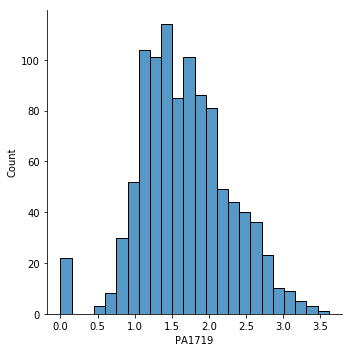

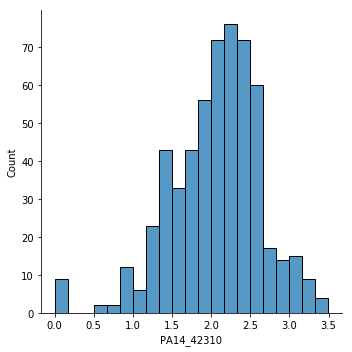

In [22]:
sns.displot(np.log10(pao1_expression[pao1_most_id] + 1))
sns.displot(np.log10(pa14_expression[pa14_most_id] + 1))

### Example of least stable core gene

In [23]:
# Least stable core gene
# pao1_least_id = "PA4685"
# pa14_least_id = "PA14_61980"

pao1_least_id = "PA2458"
pa14_least_id = "PA14_32830"

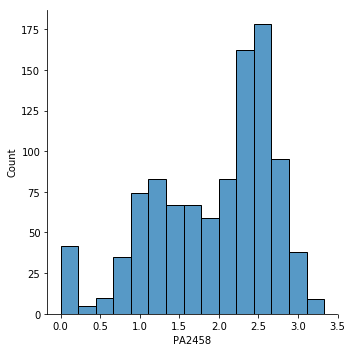

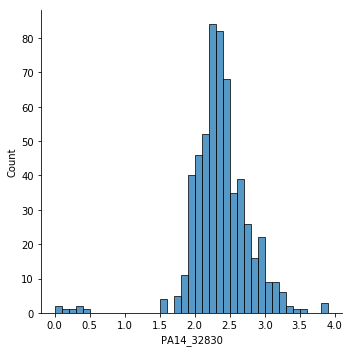

In [24]:
sns.displot(np.log10(pao1_expression[pao1_least_id] + 1))
sns.displot(np.log10(pa14_expression[pa14_least_id] + 1))